In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('KAG_conversion_data.csv')

In [4]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


## Let's categorize the spent category to visualize it neatly.

In [5]:
def fnc1(x):
    if x>500:
        return 'Over 500'
    elif x>100:
        return 'Between 100-500'
    elif x >10:
        return 'Between 10-100'
    else:
        return 'Below 10'

In [6]:
df['SpentCat'] = df['Spent'].apply(fnc1)

# Some visualization for both numerical and categorical values.

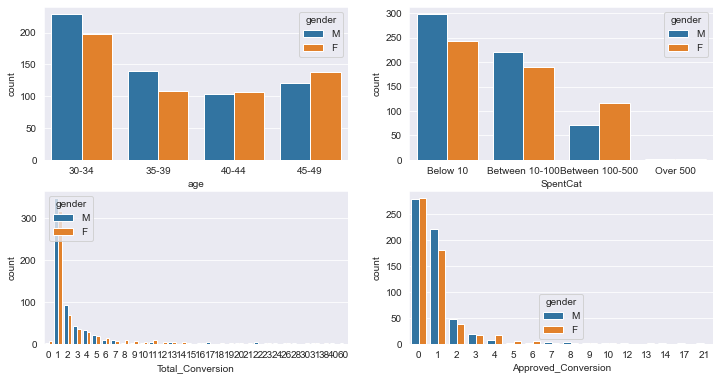

In [8]:
col1 = ["age","SpentCat","Total_Conversion","Approved_Conversion"]
plt.figure(figsize=(12,8))
k = 0
for i in col1:
        k = k+1
        plt.subplot(8,2,k)
        t = sns.countplot(data=df, x=i, hue='gender')

plt.subplots_adjust(bottom=-1, top=1.5)
plt.show()

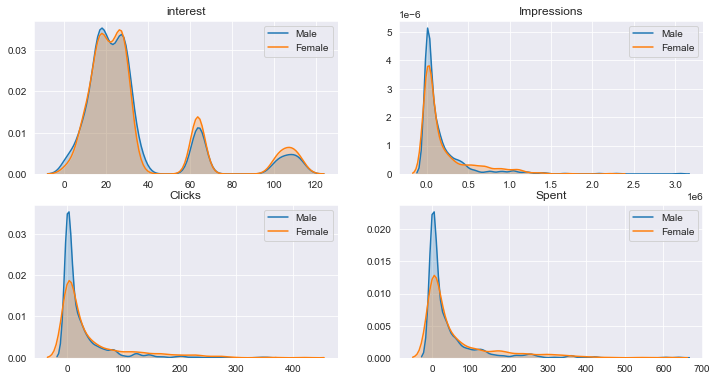

In [9]:
col2 = ["interest","Impressions","Clicks","Spent"]
plt.figure(figsize=(12,8))
k = 0
for i in col2:
        k = k+1
        plt.subplot(8,2,k)
        sns.kdeplot(df[df['gender']=='M'][i], shade=True)
        sns.kdeplot(df[df['gender']=='F'][i], shade=True)
        plt.legend(labels=['Male', 'Female'])
        plt.title(i)
plt.subplots_adjust(bottom=-1, top=1.5)
plt.show()

In [10]:
df.drop('SpentCat', axis=1, inplace=True)

## Let's play with 'ad_id' and 'fb_campaign_id' columns to get something out of ambiguity.

In [11]:
df['ad_id']=df['ad_id'].apply(lambda x:str(x)[:3])

In [12]:
df['fb_campaign_id']=df['fb_campaign_id'].apply(lambda x:str(x)[:3])

In [13]:
df.select_dtypes(include='object').head()

,ad_id,fb_campaign_id,age,gender
0,708,103,30-34,M
1,708,103,30-34,M
2,708,103,30-34,M
3,708,103,30-34,M
4,708,103,30-34,M


In [14]:
ad = pd.get_dummies(df['ad_id'],drop_first=True)
fb = pd.get_dummies(df['fb_campaign_id'], drop_first=True)
xyz = pd.get_dummies(df['xyz_campaign_id'], drop_first=True)
age = pd.get_dummies(df['age'], drop_first=True)
gen = pd.get_dummies(df['gender'], drop_first=True)

In [15]:
data = pd.concat([df.drop(['ad_id', 'fb_campaign_id','gender','age','xyz_campaign_id'], axis=1), ad, fb, gen,age, xyz], axis=1)

In [16]:
X = data.drop('M', axis=1).values
y = data['M'].values

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [19]:
scaler = MinMaxScaler()

## Just fitting the training set to prevent data leakage.

In [20]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Using Early Stopping to prevent overfitting.

In [22]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

## Now, building the neural network.

In [23]:
X_train.shape

(914, 44)

In [24]:
md = Sequential()

md.add(Dense(units=44, activation='relu'))
md.add(Dropout(0.5))

md.add(Dense(units=22, activation='relu'))
md.add(Dropout(0.5))

md.add(Dense(units=11, activation='relu'))
md.add(Dropout(0.5))

md.add(Dense(units=5, activation='relu'))
md.add(Dropout(0.5))

md.add(Dense(units=1, activation='sigmoid'))

md.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
md.fit(x=X_train, y=y_train, epochs=600,validation_data=(X_test, y_test), verbose=1, callbacks=[es])

Epoch 1/600
29/29 [==============================] - 0s 8ms/step - loss: 0.7455 - accuracy: 0.4869 - val_loss: 0.6819 - val_accuracy: 0.5764
Epoch 2/600
29/29 [==============================] - 0s 2ms/step - loss: 0.7077 - accuracy: 0.5131 - val_loss: 0.6871 - val_accuracy: 0.5764
Epoch 3/600
29/29 [==============================] - 0s 2ms/step - loss: 0.7054 - accuracy: 0.5022 - val_loss: 0.6922 - val_accuracy: 0.4891
Epoch 4/600
29/29 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5109 - val_loss: 0.6944 - val_accuracy: 0.4803
Epoch 5/600
29/29 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.4880 - val_loss: 0.6947 - val_accuracy: 0.4672
Epoch 6/600
29/29 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5306 - val_loss: 0.6936 - val_accuracy: 0.4803
Epoch 7/600
29/29 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5252 - val_loss: 0.6931 - val_accuracy: 0.4891
Epoch 8/600
2

Epoch 116/600
29/29 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.6980 - val_loss: 0.5260 - val_accuracy: 0.7293
Epoch 117/600
29/29 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7112 - val_loss: 0.5264 - val_accuracy: 0.7293
Epoch 118/600
29/29 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7144 - val_loss: 0.5275 - val_accuracy: 0.7118
Epoch 119/600
29/29 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.6805 - val_loss: 0.5383 - val_accuracy: 0.7118
Epoch 120/600
29/29 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.6893 - val_loss: 0.5289 - val_accuracy: 0.6987
Epoch 121/600
29/29 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.6937 - val_loss: 0.5280 - val_accuracy: 0.7118
Epoch 122/600
29/29 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.6937 - val_loss: 0.5276 - val_accuracy: 0.7162

Epoch 173/600
29/29 [==============================] - 0s 3ms/step - loss: 0.5500 - accuracy: 0.7046 - val_loss: 0.5143 - val_accuracy: 0.7380
Epoch 174/600
29/29 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.7079 - val_loss: 0.5151 - val_accuracy: 0.7205
Epoch 175/600
29/29 [==============================] - 0s 2ms/step - loss: 0.5487 - accuracy: 0.7298 - val_loss: 0.5144 - val_accuracy: 0.7205
Epoch 176/600
29/29 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.7177 - val_loss: 0.5152 - val_accuracy: 0.7293
Epoch 177/600
29/29 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.7287 - val_loss: 0.5069 - val_accuracy: 0.7555
Epoch 178/600
29/29 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7155 - val_loss: 0.5216 - val_accuracy: 0.7249
Epoch 179/600
29/29 [==============================] - 0s 3ms/step - loss: 0.5478 - accuracy: 0.7166 - val_loss: 0.5138 - val_accuracy: 0.7336

In [26]:
predictions = md.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


## 75% accuracy is quite good since all variables are really similar for both genders.

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72        96
           1       0.82      0.74      0.77       133

    accuracy                           0.75       229
   macro avg       0.75      0.75      0.75       229
weighted avg       0.76      0.75      0.75       229



## To test the model, let's get 10 random advertisements and try to predict the gender.

In [28]:
def fnc(x,y):
    if x == y:
        return 'Correct'
    else:
        return 'Fail'

In [29]:
rand= np.random.randint(1,len(data),10)
p = []
c = []
p2 = []


for i in rand:
    ad = data.drop('M',axis=1).iloc[i]
    pr = md.predict_classes(ad.values.reshape(1,44))
    cr = data.iloc[i]['M']
    p.append(pr)
    c.append(cr)
    
for j in range(0,10):
        p2.append(p[j][0][0]) 

tb = pd.DataFrame([c,p2]).transpose()
tb.columns = ['Real Value', 'Prediction']
tb['Result'] = tb.apply(lambda x: fnc(x['Real Value'], x['Prediction']), axis=1)
rate = len(tb[tb['Result']=='Correct'])/10
txt = "Accuracy is {pred:.2f}"
print(txt.format(pred = rate))
tb

Accuracy is 0.80


,Real Value,Prediction,Result
0,1.0,1.0,Correct
1,1.0,1.0,Correct
2,1.0,1.0,Correct
3,1.0,1.0,Correct
4,1.0,1.0,Correct
5,0.0,1.0,Fail
6,1.0,1.0,Correct
7,1.0,1.0,Correct
8,1.0,1.0,Correct
9,0.0,1.0,Fail


## 80% Accuracy. 8 correct out of 10.